<a href="https://colab.research.google.com/github/Harsh28-raj/mlcoe_pro_task_2/blob/main/task_2_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
housing = fetch_california_housing(as_frame=True)
df = housing.frame

In [4]:
df.shape

(20640, 9)

In [5]:
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [7]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [9]:
df.sample(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
7453,4.3667,36.0,4.913655,1.010040,1532.0,3.076305,33.92,-118.17,1.718
12620,6.4667,17.0,6.236364,0.963636,1365.0,2.757576,38.50,-121.53,2.168
14355,3.8036,26.0,5.609091,1.018182,251.0,2.281818,32.75,-117.22,1.620
15518,3.5462,19.0,5.226640,0.982107,1444.0,2.870775,33.14,-117.08,1.568
12914,2.7740,22.0,5.114024,1.107471,1870.0,2.450852,38.61,-121.32,1.902


In [10]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [11]:
df.duplicated().sum()

np.int64(0)

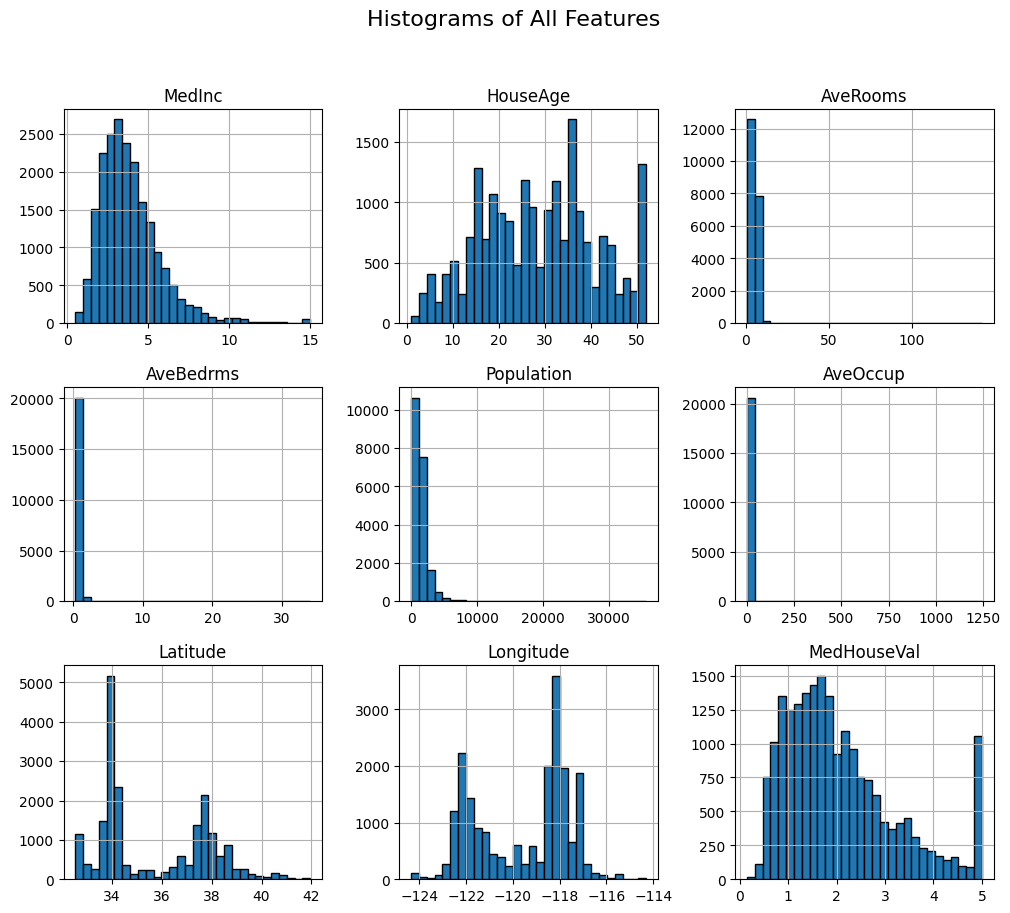

In [12]:
df.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle("Histograms of All Features", fontsize=16)
plt.show()

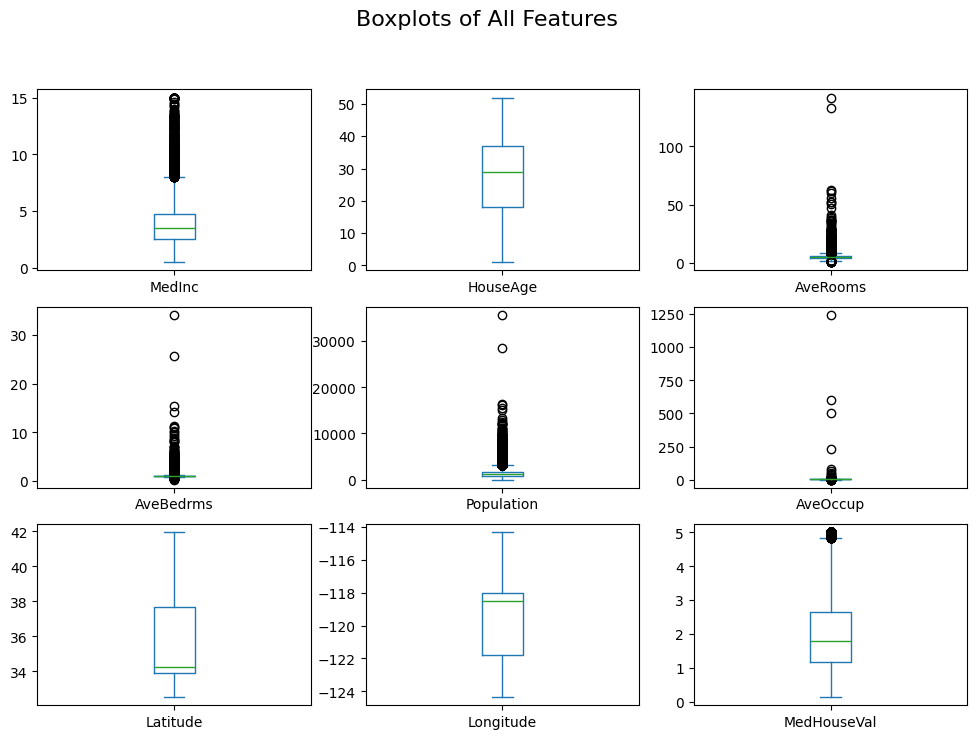

In [13]:
df.plot(kind='box', subplots=True, layout=(3, 3), figsize=(12, 8), sharey=False)

plt.suptitle("Boxplots of All Features", fontsize=16)
plt.show()

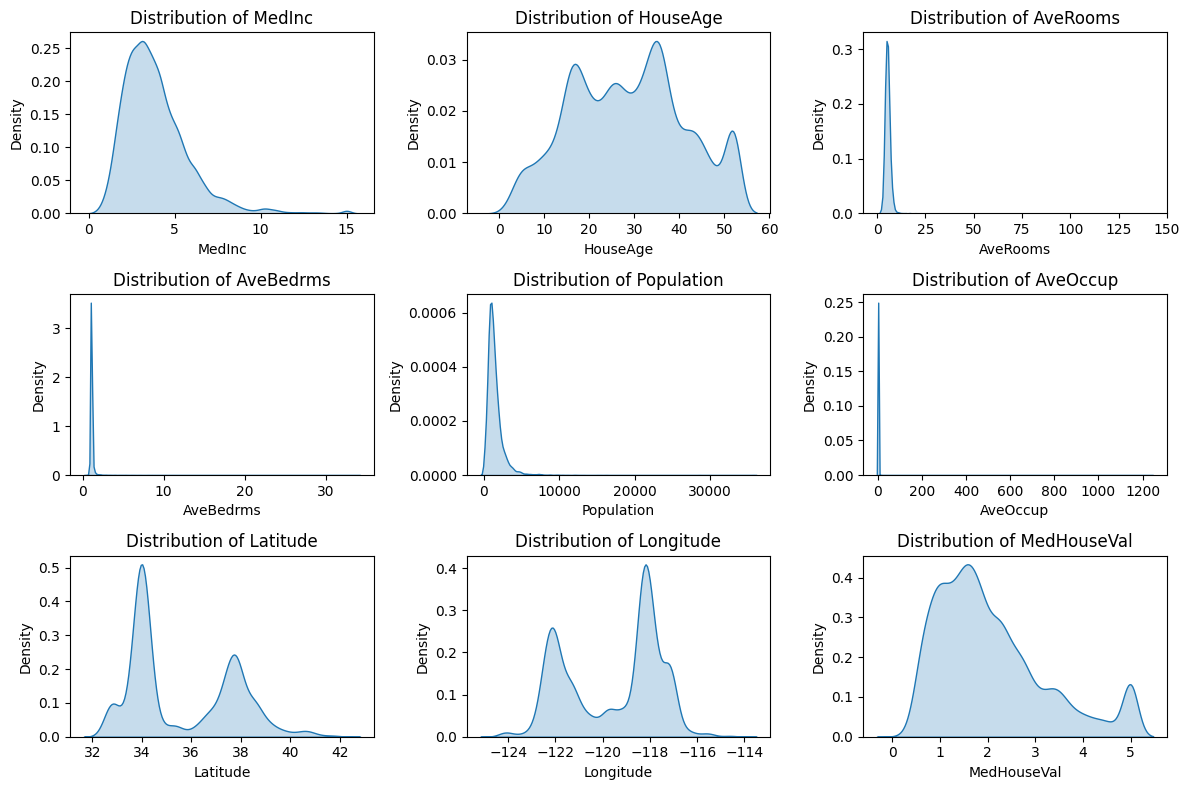

In [14]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns):
    plt.subplot(3, 3, i + 1)
    sns.kdeplot(data=df, x=col, fill=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

In [15]:
print(df.columns)


Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')


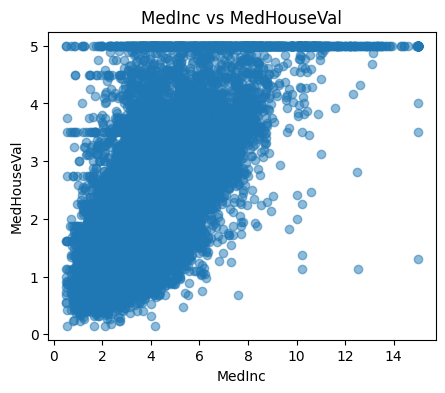

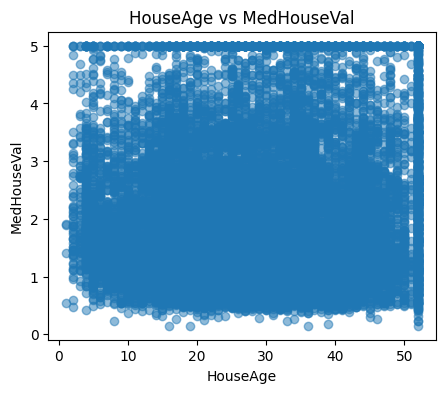

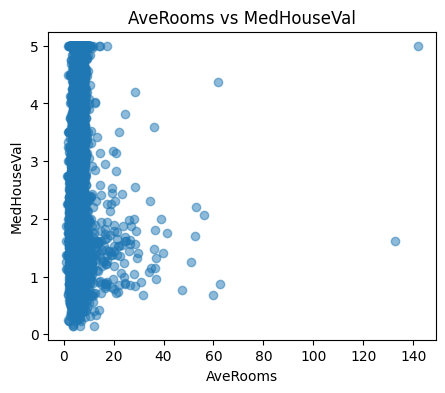

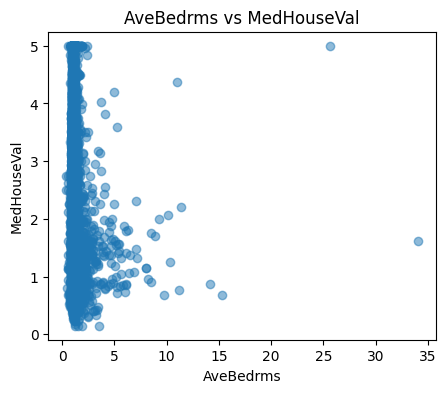

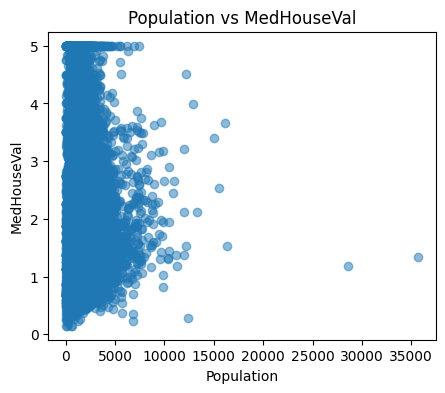

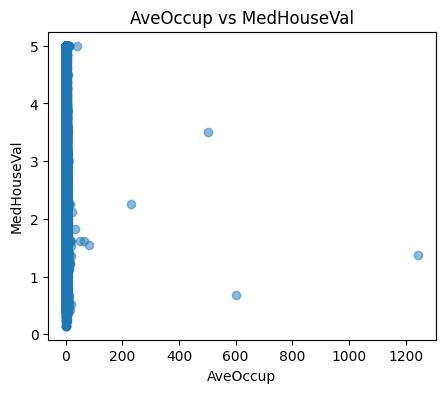

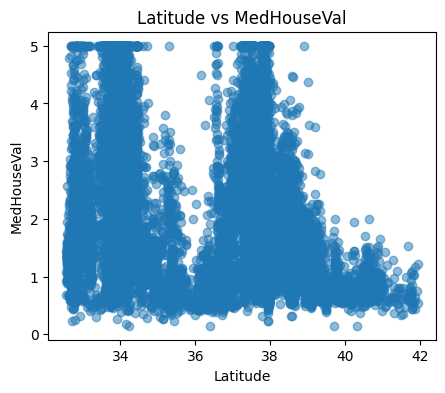

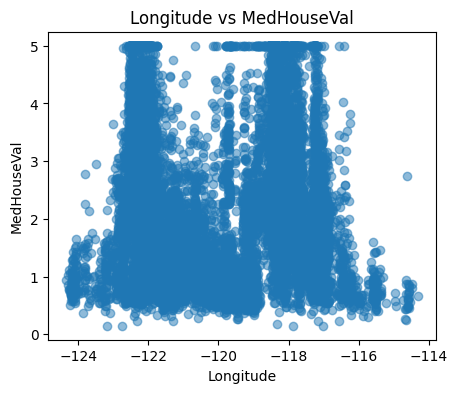

In [16]:
target = "MedHouseVal"


for column in df.columns:
    if column != target:
        plt.figure(figsize=(5, 4))
        plt.scatter(df[column], df[target], alpha=0.5)
        plt.xlabel(column)
        plt.ylabel(target)
        plt.title(f"{column} vs {target}")
        plt.show()

In [17]:
# Correlation
corr1 = df['AveRooms'].corr(df['AveBedrms'])
print(f"Correlation between AveRooms and AveBedrms: {corr1:.3f}")

Correlation between AveRooms and AveBedrms: 0.848


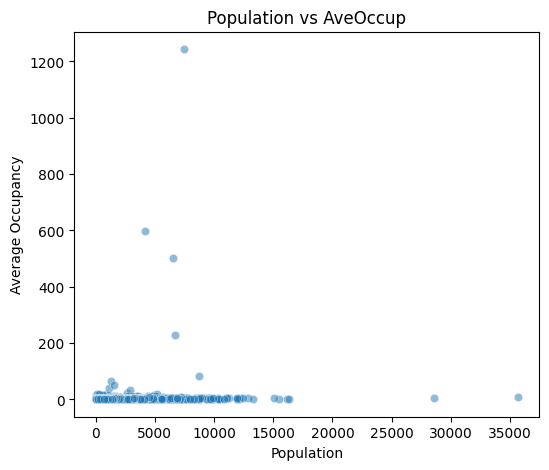

In [18]:
#  Population vs AveOccup

plt.figure(figsize=(6, 5))
sns.scatterplot(x=df['Population'], y=df['AveOccup'], alpha=0.5)
plt.xlabel("Population")
plt.ylabel("Average Occupancy")
plt.title("Population vs AveOccup")
plt.show()

In [19]:

corr2 = df['Population'].corr(df['AveOccup'])
print(f"Correlation between Population and AveOccup: {corr2:.3f}")

Correlation between Population and AveOccup: 0.070


In [20]:
pairs = [
    ('AveRooms', 'AveBedrms'),
    ('Population', 'AveOccup'),
    ('MedInc', 'AveRooms'),
    ('HouseAge', 'MedInc')
]

In [21]:
print("Correlation for each pair")
for x_col, y_col in pairs:
    corr = df[x_col].corr(df[y_col])
    print(f"{x_col} vs {y_col}: {corr:.3f}")

Correlation for each pair
AveRooms vs AveBedrms: 0.848
Population vs AveOccup: 0.070
MedInc vs AveRooms: 0.327
HouseAge vs MedInc: -0.119


In [22]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [23]:
print("Before Trim")
print(f" {df.shape}")


column_to_clean = 'MedInc'


Q1 = df[column_to_clean].quantile(0.25)
Q3 = df[column_to_clean].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_trimmed = df[(df[column_to_clean] >= lower_bound) & (df[column_to_clean] <= upper_bound)]

print("After Trim")
print(f" {df_trimmed.shape}")

Before Trim
 (20640, 9)
After Trim
 (19959, 9)


In [24]:
print("Before Capping")
print(df['MedInc'].describe())
print(df.shape)

column_to_clean = 'MedInc'

#outlier boundaries
Q1 = df[column_to_clean].quantile(0.25)
Q3 = df[column_to_clean].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

df_capped = df.copy()


df_capped[column_to_clean] = np.where(
    df_capped[column_to_clean] > upper_bound,
    upper_bound,
    df_capped[column_to_clean]
)

print("After Capping")
print(df_capped['MedInc'].describe())

print(df_capped.shape)

Before Capping
count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: MedInc, dtype: float64
(20640, 9)
After Capping
count    20640.000000
mean         3.801010
std          1.657658
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max          8.013025
Name: MedInc, dtype: float64
(20640, 9)


In [25]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [26]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [27]:

X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)


print(X_train.head())


print(X_train_scaled_df.head())


print(X_train_scaled_df.describe().loc[['mean', 'std']])

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
14196  3.2596      33.0  5.017657   1.006421      2300.0  3.691814     32.71   
8267   3.8125      49.0  4.473545   1.041005      1314.0  1.738095     33.77   
17445  4.1563       4.0  5.645833   0.985119       915.0  2.723214     34.66   
14265  1.9425      36.0  4.002817   1.033803      1418.0  3.994366     32.69   
2271   3.5542      43.0  6.268421   1.134211       874.0  2.300000     36.78   

       Longitude  
14196    -117.03  
8267     -118.16  
17445    -120.48  
14265    -117.11  
2271     -119.80  
     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0 -0.326196  0.348490 -0.174916  -0.208365    0.768276  0.051376 -1.372811   
1 -0.035843  1.618118 -0.402835  -0.128530   -0.098901 -0.117362 -0.876696   
2  0.144701 -1.952710  0.088216  -0.257538   -0.449818 -0.032280 -0.460146   
3 -1.017864  0.586545 -0.600015  -0.145156   -0.007434  0.077507 -1.382172   
4 -0.171488  1.

In [30]:

target_corr = df.corr()['MedHouseVal']


In [31]:

model = LinearRegression()
model.fit(X_train_scaled, y_train)



y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE :- {mse:.2f}")
print(f" R² Score:- {r2:.2f}")

MSE :- 0.56
 R² Score:- 0.58


In [32]:
X_test_scaled

array([[-1.15508475, -0.28632369, -0.52068576, ...,  0.06740798,
         0.1951    ,  0.28534728],
       [-0.70865905,  0.11043502, -0.16581537, ..., -0.03602975,
        -0.23549054,  0.06097472],
       [-0.21040155,  1.85617335, -0.61076476, ..., -0.14998876,
         1.00947776, -1.42487026],
       ...,
       [ 2.80902421, -0.28632369,  0.75501156, ..., -0.02646898,
         0.78014149, -1.23041404],
       [-0.57542978,  0.58654547, -0.06124296, ..., -0.04390537,
         0.52740357, -0.08860699],
       [-0.17259111, -0.92113763, -0.6058703 , ...,  0.05466644,
        -0.66608108,  0.60445493]])

In [33]:
X


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [34]:

X_train.shape[0]

16512

In [35]:
X.shape

(20640, 8)

In [36]:
X_test.shape

(4128, 8)